# Regresión Lineal 

By Santiago Gutiérrez Hernández

## Introducción 

En la modelación matemática y estadística uno de los modelos que se utiliza para explicar o predecir el comportamiento lineal entre una o varias características (variables independientes) y una variable objetivo (variable dependiente) es la regresión lineal. Es un modelo muy usado dada la simplicidad y generalización en diferentes campos de las ciencias. 

La regresión lineal no es mas sino una manera simplificada  de explicar la realidad, que cuenta con un soporte extenso por parte de la matemática y la estadística.


Este ensayo busca proporcionar un conocimiento básico sobre la regresión lineal. Adicional se realizara un ejercicio con el conjunto de datos Wine Quality Data Set para su mejor entendimiento.

La primera parte de este ensayo corresponde a esta introducción. En la segunda parte se realizara un breve recorrido histórico de su origen. La tercera parte corresponde al planteamiento formal del modelo de regresión lineal. La cuarta parte corresponde a la implementación del modelo con datos reales. La quinta y última parte corresponde a las conclusiones de este ensayo.

## História 

La primera forma de regresión lineal documentada se encuentra en un articulo publicado por Legendre en 1805. Legendre en este artículo expusó el metódo de los minimos cuadrados.

Años mas tarde, Gauss publicó un trabajo donde desarrollo de manera mas profunda el metódo de los minimos cuadrados y dónde además incluía una versión del teorema de Gauss-Márkov.

Hasta este punto, no se reconocia de manera explícita el termíno de regresión. El termíno de regresión se utilizó por primera vez por Francis Galton en su libro Naturalinheritance en 1889 y luego confirmado por Karl Pearson. En su trabajo, Galton se centró en explicar la estatura de los hijos a través de la estatura de sus padres.

Por ultimó el termino lineal se empleó  para distinguirlo del resto de técnicas de regresión, que empleaban modelos basados en cualquier otra clase de función matemática.

## Planteamiento

Dado un conjunto de datos, el algoritmo de regresión establecerá un modelo para ajustar la relación de dependencia entre una o varias caracteristicas especificas e independientes ($X$) y la variable objetivo (y).

Esta relación se establecerá a través de una linea arbitraria. Entre esta linea (representación o aproximación de la realidad) y los valores correspondientes a los valores reales ($X, y$) habrá una distancia. La distancia entre la linea y los puntos, son los "residuos" o los "errores de predicción".

El algoritmo de regresión lo que hace es mover esa linea buscando aquella que se ajuste mejor a los datos. En otro palabras aquella linea que minimice los errores, es decir la mas cercana al maximo numero de puntos posible.

![Regresión Lineal](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/800px-Linear_regression.svg.png)


### Regresión Lineal Simple

Un modelo de regresión lineal simple esta conformado solo por una característica ($x$) y la variable objetivo $(y)$. La definiremos de la siguiente manera:

$$y=w_0 + w_1x$$

donde $w_0, w_1$ son los coeficientes de la regresión.

### Regresión Lineal Múltiple

Un modelo de regresión lineal múltiple esta conformado por mas de una característica ($X$) y la variable objetivo $(y)$. La definiremos de la siguiente manera:

$$y=w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

donde $W$ son los coeficientes de la regresión.

### Estimación de los parametros

Los coeficientes de la regresión son constantes desconocidas y son los parametros a estimar del modelo. Estos parametros se pueden estimar utilizando el método de minimos cuadrados. Es decir, minimizando la función del error cuadrático medio (ECM). En forma matricial podemos definir la función ECM de la siguiente manera:

$$ECM(W) = (Y-XW)^T(Y-XW)$$

### Hipótesis

Antes de seguir con el ejercicio es importante conocer algunas hipótesis para trabajar con un modelo de regresión lineal:

- Los errores tienen una distribución normal.
- La media de los errores es igual a 0.
- La varianza de los errores es igual y constante.
- La covarianza entre lso errores las distintas muestras es nula.
- No existe relación lineal entre las caracteristicas (variables independientes).

## Modelo (Calidad de los vinos)

Para explicar mejor que es un modelo de regresión lineal, vamos a realizar un ejercicio utilizando al información de Wine Quality Data Set. El conjunto de datos contiene información de diferentes pruebas fisicoquímicas de muestras de vino tinto y blanco vinho verde, del norte de Portugal. El objetivo es modelar la calidad del vino a partir de las caracteristicas de sus pruebas fisicoquímicas.

Importamos algunas librerias que nos ayudaran a cargar el conjunto de datos y realizar algunos arreglos para poder trabajar con los datos:

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Llamamos el conjunto de datos:

In [15]:
vinos = pd.read_csv("/Users/sgutierrezh/Downloads/winequality-red.csv", sep = ";")
vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Para este ejercicio solo vamos a llamar la variable calidad y alcohol. El objetivo sera ver si hay una relación entre la calidad de un vino con su grado de alcohol. Se grafíca la calidad del vino contra su grado de alcohol: 

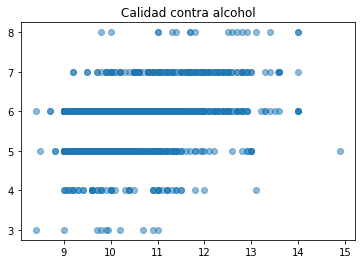

None


In [46]:
calidad = np.array(vinos["quality"])
alcohol = np.array(vinos["alcohol"])

def relation_calidad_alcohol(x, y):
  plt.scatter(x, y, alpha=0.5)
  plt.title("Calidad contra alcohol")
  plt.show()

print(relation_calidad_alcohol(alcohol, calidad))



Con la libreria sklearn hacemos la regresión lineal:

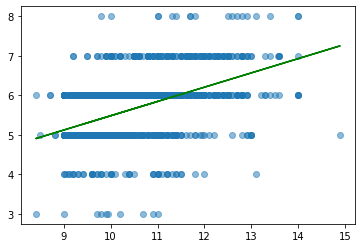

Modelo (Calidad vino): Coeficiente w1 = 0.36084176533503454 , Coeficiente w0 = 1.8749748869971525 . Error cuadratico medio = 0.5039840256714571


In [55]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#rm.reshape(-1, 1) cambia las dimensiones de rm, de tal manera que la segunda dimensión es 1. 
# el -1 indica a Python que recalcule la primera dimensión.
# En resumen, tranforma el vector rm en una matriz de tamaño n*1.
def use_sklearn():
  modelo = linear_model.LinearRegression().fit(alcohol.reshape(-1, 1), calidad)

  yp = modelo.predict(alcohol.reshape(-1, 1))

  plt.plot(alcohol, yp, color="green")
  plt.scatter(alcohol, calidad, alpha=0.5)
  plt.show()
  
  fit_intercept_error = mean_squared_error(calidad, yp)

  print("Modelo (Calidad vino): Coeficiente w1 =", modelo.coef_[0], ", Coeficiente w0 =",
        modelo.intercept_, ". Error cuadratico medio =", fit_intercept_error)
  
use_sklearn()

Si bien la relación aqui presentada entre la calidad del vino y el grado de alcohol no es perfecta. El siguiente modelo nos esta diciendo que hay una relación positiva entre el grado de alcohol y la calidad del vino. Es decir, manteniendo todo lo demas constante un aumento de una unidad en el grado de alcohol aumenta la calidad del vino en 0.36 unidades. De una manera mas simple, este modelo nos esta diciendo que los vinos que poseen un mayor grado de alcohol en general tienen mayor calidad que los que no.

## Conclusiones

A lo largo de este ensayo pudimos identificar que es un modelo de regresión lineal, sus origenes, aspectos basicos, para que sirve y como lo podemos utilizar en la vida real.

El modelo de regresión lineal es un algoritmo muy sencillo y poderoso que bien usado nos permite medir en una relación lineal (aproximación sencilla de la realidad) el comportamiento entre un conjunto de variables o caracteristicas y una variable objetivo. De este modo, podemos inferir y predecir el comportamiento de la variable objetivo a través del comportamiento de sus características.

## Bibliografía

- [Regresión Lineal - Wikipedia](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)

- [Machine Learning supervisado: Fundamentos de la Regresión Lineal - Medium](https://medium.com/datos-y-ciencia/machine-learning-supervisado-fundamentos-de-la-regresi%C3%B3n-lineal-bbcb07fe7fd)

- [Wine Quality Data Set - UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality)